In [1]:
import numpy as np
import jax
import jax.numpy as jnp
from tqdm import tqdm
from abc import ABC, abstractmethod, abstractclassmethod
import matplotlib.pyplot as plt

In [302]:
# pos, vel, acc = 0, 0, 1
# neg_bound, pos_bound = -5, 5

def update(pos, vel, a, dt=0.1):
    new_vel = vel + a*(dt)
    new_pos = pos + new_vel*(dt)
    return new_pos, new_vel

def update2(pos, vel, a, dt=0.1):
    new_vel = vel + a*(dt)
    new_pos = pos + new_vel*(dt) + 0.5*a*(dt)**2
    return new_pos, new_vel
def update3(pos, vel, a, dt=0.1):
    new_vel = vel + a*(dt)
    new_pos = pos + 0.5*vel*(dt) + 0.5*new_vel*(dt)
    return new_pos, new_vel
f = lambda t, ø, a: ø + 0.5*a*t**2

In [303]:
n = 5
s1 = 0
s2 = 1
x = np.linspace(s1, s2, n)

ø,w,a = s1, 0, 1
y1 = f(x, s1, a)
y2 = [0]*n
for i in range(n):
    y2[i] = ø
    ø, w = update(ø, w, a, dt=(s2-s1)/n)
ø,w = 0, 0
y3 = [0]*n
for i in range(n):
    y3[i] = ø
    ø, w = update2(ø, w, a, dt=(s2-s1)/n)
ø,w = 0, 0
y4 = [0]*n
for i in range(n):
    y4[i] = ø
    ø, w = update3(ø, w, a, dt=(s2-s1)/n)

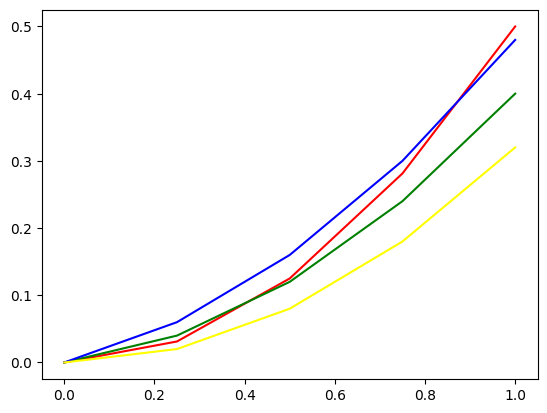

In [304]:
plt.plot(x, y1, color="red")
plt.plot(x, y2, color="green")
plt.plot(x, y3, color="blue")
plt.plot(x, y4, color="yellow")

In [482]:
def _step_function(state, U, D):
    p1, q1, q2 = state # Unpack vars

    # Update quantities
    q1 += U
    q2 += D

    # Enforce limits
    q1, q2 = jnp.maximum(jnp.array([q1, q2]), 0)
    q1, q2 = jnp.minimum(jnp.array([q1, q2]), 1)

    # Sum quantity
    q = q1 + q2

    # Calculate global price
    p = 2.1 - q

    # Calculate price for 1
    p1 = q1*(p - 0.1)

    return jnp.array([p1, q1, q2]), .5-p1

def pid(params, err_hist):
    e = err_hist[-1]
    ei = sum(err_hist)
    ed = err_hist[-1] - err_hist[-2]
    x = np.array([e, ei, ed])

    return np.dot(params, x)

In [492]:
state = jnp.array([0,0.5,0.5], dtype=float)
error = 0.5 - state[0]
params = jnp.array([1, 0.1, 0.1])
err_hist = jnp.array([error])
U = 0

In [497]:
for i in range(100):
    state, error = _step_function(state, U, (np.random.rand(1)[0]*2 - 1)*0.05)
    err_hist = jnp.append(err_hist, error)
    U = pid(params, err_hist)
state, U, error.item()

(Array([0.48860598, 0.28488183, 0.        ], dtype=float32),
 0.010493624,
 0.011394023895263672)